In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
columns = ['Sample code number','Clump Thickness','Uniformity of Cell Size ','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei',' Bland Chromatin','Normal Nucleoli',' Mitoses ','Class'];
cancer = pd.read_csv('/content/gdrive/My Drive/4th year/Data Analytics/datafile.csv',names=columns)

In [ ]:
cancer.drop(columns='Sample code number', inplace = True)
cancer["Class"].replace({2: -1, 4: +1}, inplace=True)

In [ ]:
x = cancer.iloc[:, :-1].values
y = cancer.iloc[:, 9].values
print(cancer.head())

   Clump Thickness  Uniformity of Cell Size   ...   Mitoses   Class
0                5                         1  ...          1     -1
1                5                         4  ...          1     -1
2                3                         1  ...          1     -1
3                6                         8  ...          1     -1
4                4                         1  ...          1     -1

[5 rows x 10 columns]


In [ ]:
print(x.shape, y.shape) #check the shape of data

(699, 9) (699,)


In [ ]:
class PCA():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        # Compute the sample mean
        self.mean = np.mean(x, axis=0)
        #generate covariance matrix
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        #find the eigen values and eigen vectors
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        #sort eigen values in descending order
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        #Project the dataset onto the vector space
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        self.explained_variance = self.eigen_values[self.sorted_components]
        #get the percentage of the explained variance
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [ ]:
# standardize the data
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

In [ ]:
#generate PCA for two components
pca = PCA(no_of_components=2)
pca.fit(transformed)

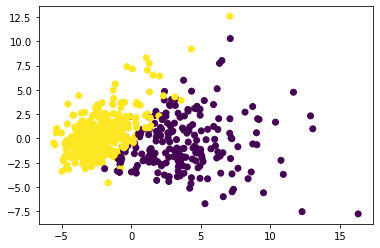

In [ ]:
x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)